## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_num = len(combined_data_df["Mouse ID"].value_counts())
mice_num

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# The duplicated formula helps to identify the duplicities. Then use "subset = ["column A","column B"]" to find it in specific columns. 
# Option 2: setting a formula "keep=False" all duplicates are True (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

duplicated_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicated_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# Show in the DF the values for an specific objet. Looking in the column of the DF the specific value usin "==" and "variable".

duplicated_mouse = combined_data_df[combined_data_df["Mouse ID"]=="g989"]     # Total Amount of duplicated values is 10 values
duplicated_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Inside the DF we choose all the values different "!=" to the value we found duplicated.

clean_data_df = combined_data_df[combined_data_df["Mouse ID"]!="g989"]     # Total amount of data is 1,880 rows.
clean_data_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [6]:
# Checking the number of mice in the clean DataFrame.

# Remembert to chose within [] the specific column you want the count applied in the Data Frame.

total_mice = clean_data_df["Mouse ID"].count()
total_mice

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice_stat = clean_data_df.groupby(["Drug Regimen"])

# Statitics
mean_mice = mice_stat["Tumor Volume (mm3)"].mean()          # Average of Tumor Volume
median_mice = mice_stat["Tumor Volume (mm3)"].median()      # Median of Tumor Volume
var_mice = mice_stat["Tumor Volume (mm3)"].var()            # Standar Dev of Tumor Volume
stdev_mice = mice_stat["Tumor Volume (mm3)"].std()          # Standar Dev of Tumor Volume
sem_mice = mice_stat["Tumor Volume (mm3)"].sem()          # Standar Dev of Tumor Volume

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

stat_mice_result = pd.DataFrame({"Mean":mean_mice.astype(float).map("{:,.2f}".format),     # Formatting
                               "Median":median_mice.astype(float).map("{:,.2f}".format),
                               "Variance":var_mice.astype(float).map("{:,.2f}".format),
                               "Standar Deviation":stdev_mice.astype(float).map("{:,.2f}".format),
                               "SEM":sem_mice.astype(float).map("{:,.2f}".format)
                               })

stat_mice_result.head()


,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Result printed in last point ##

# Using the aggregation method, produce the same summary statistics in a single line. 
# We have already defined the groupby by Drug Regimen, we add the Tummor Volume and the formula allow us to add the statistics ({key:[val a, val b]})

summary_table = mice_stat.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Drug Measurements by Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mices'>

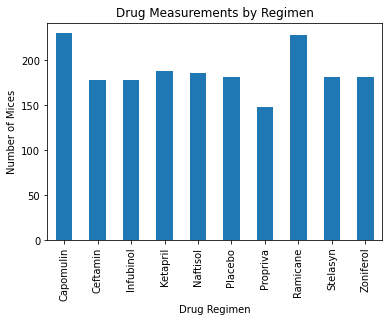

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_reg_data = mice_stat["Mouse ID"].count()
drug_reg_data.plot(kind = "bar", x = "Drug Regimen", y = drug_reg_data, ylabel = "Number of Mices", title = "Drug Measurements by Regimen")


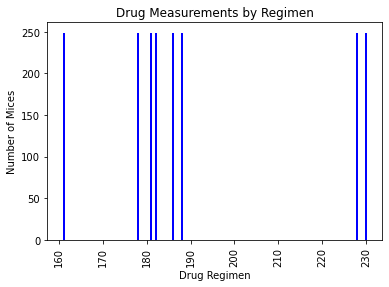

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = combined_data_df["Drug Regimen"].value_counts()
y_axis = len(combined_data_df["Mouse ID"].value_counts())

# plt.bar(mice_in_treatment.index.values, mice_in_treatment.values)
plt.bar(x_axis, y_axis, color = "b", width = .5)
# plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Additional formatting.
plt.xticks(rotation=90)
plt.title("Drug Measurements by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mices")
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
